<a href="https://colab.research.google.com/github/NaufalikhoAbyan/MPP_Collab/blob/main/17_Naufalikho_Abyan_Python_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisasi data python

menggunakan pandas untuk mencari korelasi dari jumlah penebangan hutan dengan jumlah bencana banjir

Import library pandas untuk mengolah data

In [1]:
import pandas as pd

Membuat dataframe dari file CSV

In [2]:
tree_loss_file = "sample_data/treecover_loss_by_region__ha.csv"
flood_file = "sample_data/number-of-natural-disaster-events.csv"

df_tree = pd.read_csv(tree_loss_file)
df_flood = pd.read_csv(flood_file)

Mengsortir data dari file agar hanya mengambil data dari Indonesia

In [3]:
df_tree_data = df_tree.loc[df_tree['iso']=='IDN'][['umd_tree_cover_loss__year', 'umd_tree_cover_loss__ha']]

Mengsortir data dari file agar hanya mengambil data bencana banjir

In [4]:
df_flood_data = df_flood.loc[(df_flood['Entity']=="Flood") & (df_flood["Year"]>2000) & (df_flood["Year"]<2023)][['Year', 'Number of reported natural disasters']]

Import library numpy dan matplotlib untuk menvisualisasikan data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

Membuat visualisasi data penebangan hutan dengan tabel time series


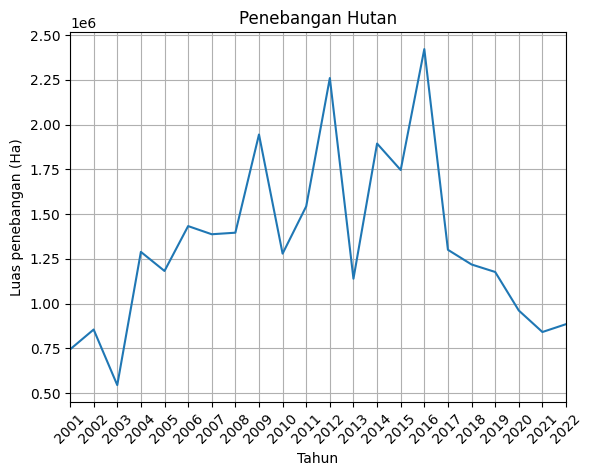

In [7]:
plt.title("Penebangan Hutan")
plt.xlabel("Tahun")
plt.ylabel("Luas penebangan (Ha)")
plt.grid()
plt.xticks(df_tree_data["umd_tree_cover_loss__year"].unique().tolist(), rotation=45)
plt.margins(x=0)
plt.plot(df_tree_data["umd_tree_cover_loss__year"].tolist(), df_tree_data["umd_tree_cover_loss__ha"].tolist())

Membuat data visualisasi bencana banjir dengan tabel time series

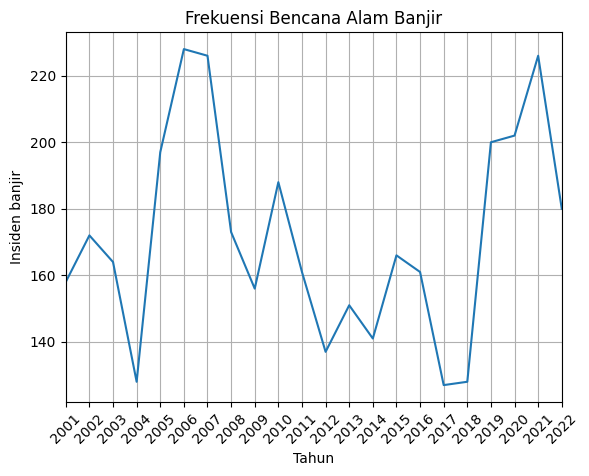

In [8]:
plt.title("Frekuensi Bencana Alam Banjir")
plt.xlabel("Tahun")
plt.ylabel("Insiden banjir")
plt.grid()
plt.xticks(df_flood_data["Year"].unique().tolist(), rotation=45)
plt.margins(x=0)
plt.plot(df_flood_data["Year"].tolist(), df_flood_data["Number of reported natural disasters"].tolist())

Membuat visualisi data korelasi antara penebangan hutan dan bencana banjir


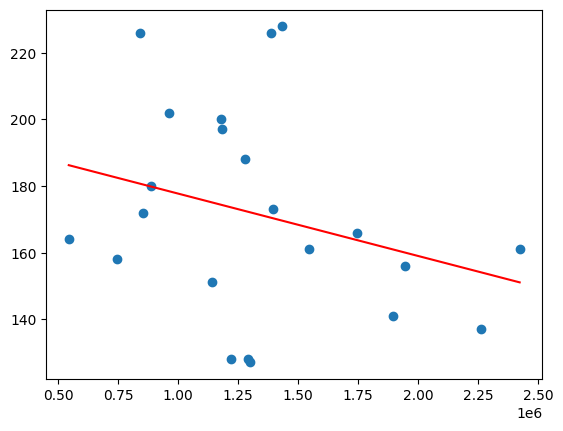

In [11]:
y = pd.Series(df_flood_data["Number of reported natural disasters"].tolist())
x = pd.Series(df_tree_data["umd_tree_cover_loss__ha"].tolist())
correlation = y.corr(x)
correlation

# plotting the data
plt.scatter(x, y)

# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')